# Instance Segmentation with CenterMask

This notebook uses an open source project [youngwanLEE/CenterMask](https://github.com/youngwanLEE/CenterMask) to make instance segmentation

For other deep-learning Colab notebooks, visit [tugstugi/dl-colab-notebooks](https://github.com/tugstugi/dl-colab-notebooks).


## Install CenterMask

In [0]:
import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/youngwanLEE/CenterMask.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # clone and install dependencies
  !git clone -q {git_repo_url}
  !pip install -q ninja yacs cython tqdm
  !cd {project_name} && python setup.py build develop
  
import sys
sys.path.append(project_name)
import time
import glob
import matplotlib
import matplotlib.pylab as plt
plt.rcParams["axes.grid"] = False

## Download pretrained models

In [0]:
pretrained_model_path = join(project_name, 'centermask-V2-99-FPN-ms-3x.pth')
pretrained_model_cfg_path = join(project_name, 'configs/centermask/centermask_V_99_eSE_FPN_ms_2x.yaml')
if not exists(pretrained_model_path):
  # download a pretrained V2-99-FPN model Mask AP 40.2, Box AP 45.6
  !wget -O {pretrained_model_path} https://www.dropbox.com/s/99i7ydsz2ngrvu1/centermask-V2-99-FPN-ms-3x.pth?dl=1

## Evaluate on a test image

First, download a test image from the internet:

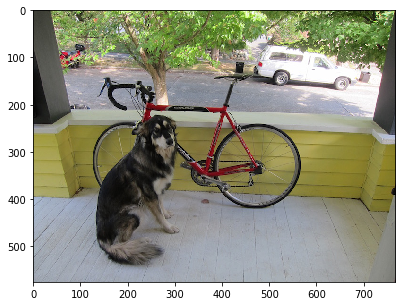

In [3]:
IMAGE_URL = 'https://raw.githubusercontent.com/tugstugi/dl-colab-notebooks/master/resources/dog.jpg'

image_file = basename(IMAGE_URL)
image_file_ext = splitext(image_file)[1][1:]
images_dir = 'images'
!mkdir -p {images_dir} && rm -rf {images_dir}/*
!wget -q -O {images_dir}/{image_file} {IMAGE_URL}

plt.figure(figsize=(10, 5))
plt.imshow(matplotlib.image.imread(join(images_dir, image_file)))

Evaluate on the above image with the confidence threshold **0.3**:

In [4]:
!mkdir -p output && rm -rf output/*
!python CenterMask/demo/centermask_demo.py --weights {pretrained_model_path} --config-file {pretrained_model_cfg_path} --conf_th 0.3 --input {images_dir} --output_dir output --display_text 1 --display_scores 1

file 0
dog processing...
dog	inference time: 0.64s


Finally, visualize the result:

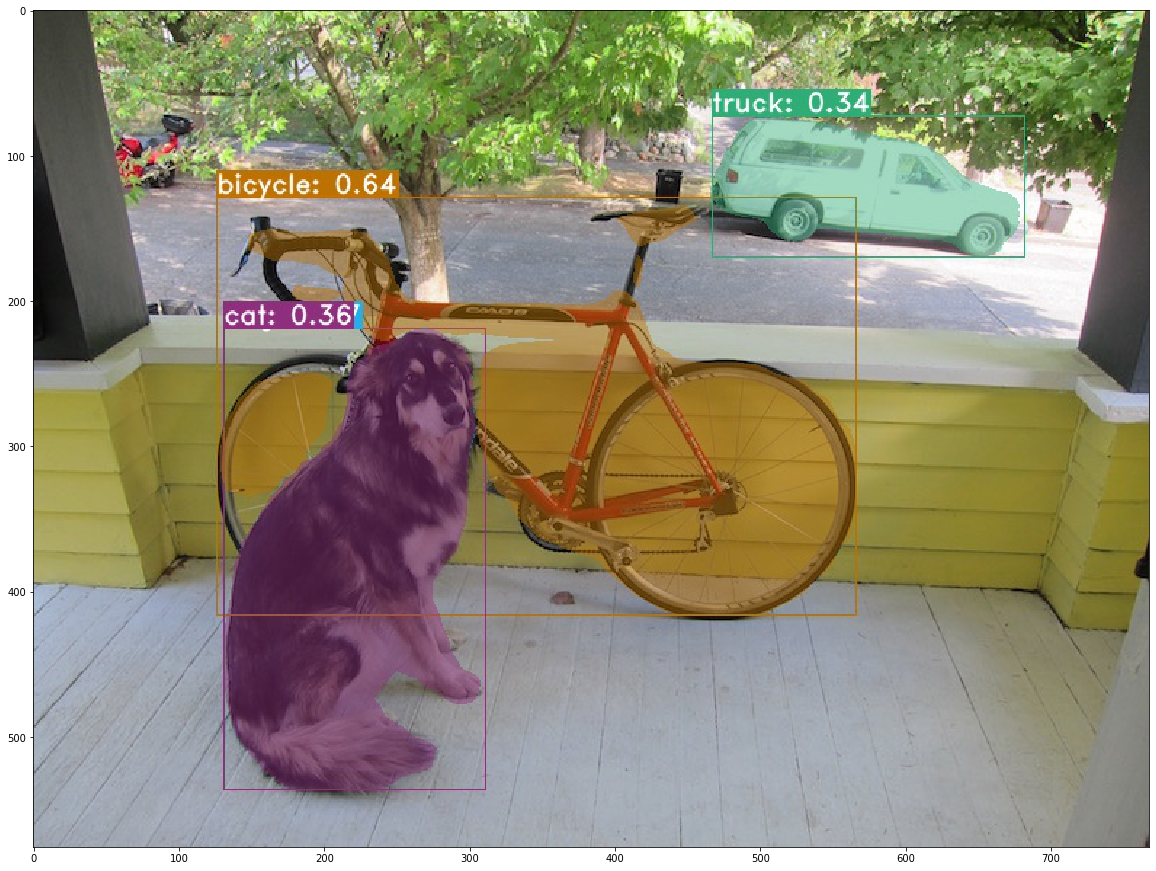

In [5]:
plt.figure(figsize=(20, 20))
plt.imshow(matplotlib.image.imread(glob.glob('output/*')[0]))